In [1]:
from datastructures.testgraph import Ein, Eout, Rin, Vtree, Ftree, Stree
from datastructures.graphutils import draw_graph_graphical_props, flat_graph_formulation, Node, VAR, COMP, all_variables, all_components, all_varnodes, sources
from datastructures.mergegraph import split_graph, merged_graph, merge_graph, get_edges, subgraph_ins
from datastructures.nestedgraph import build_typedgraph
import matplotlib

In [2]:
G = flat_graph_formulation(Ein, Eout, Rin)

In [3]:
cmap = matplotlib.cm.get_cmap('Pastel1')
def plot_subgraph(G, subgraph):
    colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): all_variables(*subgraph),
        matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
    draw_graph_graphical_props(G, colormap_subgraph, prog='sfdp', figsize=(11,4))

# Merge

In [48]:
typed_mergelts = {Node(3,COMP), Node(5, COMP)}
typed_mergelts = {Node(2,COMP),Node(3,COMP),Node(4,COMP)}
#typed_mergelts = {Node(1,COMP), Node(2,COMP), Node(3, COMP), Node(4,COMP)}

## Split graph

In [49]:
subgraph, mgraph = split_graph(G, typed_mergelts)

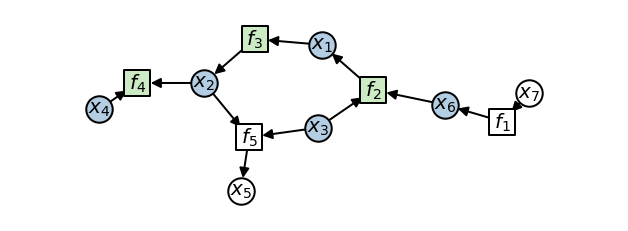

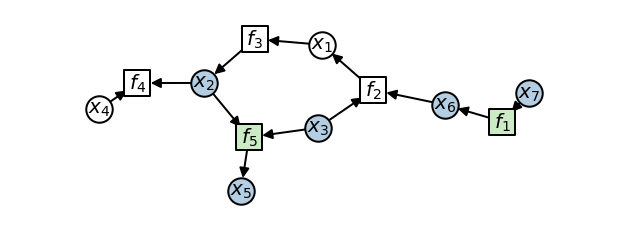

In [50]:
plot_subgraph(G, subgraph)
plot_subgraph(G, mgraph)

## Generate mergegraph

In [37]:
typed_solve_vars = {Node(3, VAR)}
merged_graph(subgraph, mgraph, 1, typed_solve_vars)

[(x_7, f_1),
 (x_3, f_2),
 (x_6, f_2),
 (x_2, f_4),
 (x_4, f_4),
 (f_1, x_6),
 (f_2, x_1),
 (x_1, s_1),
 (s_1, x_2),
 (s_1, x_3)]

## Mergegraph and subgraph

In [38]:
typed_mergelts = {Node(2,COMP),Node(3,COMP),Node(4,COMP)}
subgraph, mgraph = split_graph(G, typed_mergelts)

In [39]:
sources(*subgraph)-all_varnodes(mgraph[1]) #mgraph[1] corresponds to output variables

{x_3, x_4}

In [46]:
G_merge, G_sub = merge_graph(G, typed_mergelts, typed_solve_vars, solver_idx=1, exclude_unique_sources=False)

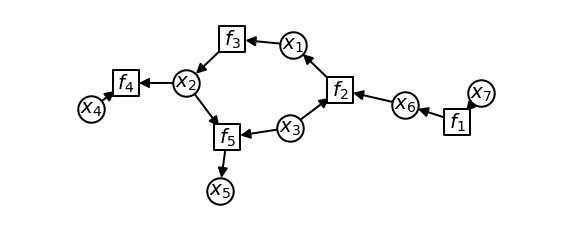

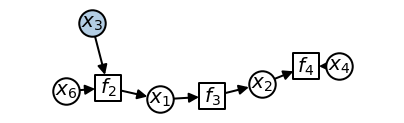

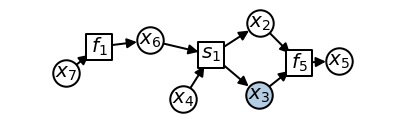

In [47]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G, prog='sfdp', figsize=(10,4))
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(7,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(7,2))

# Inputs at root level

In [12]:
Ein = {1: (1,), 2: (1,2,3)}
Eout = {1: (3,), 2: (4,)}
Rin = dict()

In [13]:
G = flat_graph_formulation(Ein, Eout, Rin)

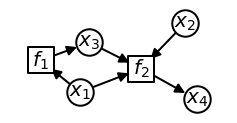

In [14]:
draw_graph_graphical_props(G, {}, prog='sfdp', figsize=(4,2))

In [33]:
typed_mergelts = {Node(2,COMP)}
typed_solve_vars = set()

In [37]:
subgraph, mgraph = split_graph(G, typed_mergelts)

In [53]:
mgraph

({f_1: {x_1}}, {f_1: {x_3}})

In [52]:
subgraph

({f_2: {x_1, x_2, x_3}}, {f_2: {x_4}})

In [49]:
sources(*subgraph)

{x_1, x_2, x_3}

In [47]:
subgraph_ins(subgraph, mgraph)

{x_1, x_3}

In [40]:
mgraph

({f_1: {x_1}}, {f_1: {x_3}})

In [34]:
G_merge, G_sub = merge_graph(G, typed_mergelts, typed_solve_vars, solver_idx=1)

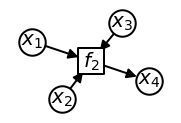

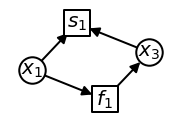

In [36]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(3,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(3,2))

# Graph from tree

In [11]:
from nestedgraph import typed_solver_children, level_order_tree, SOLVER, COMP, VAR

In [12]:
graphs = build_typedgraph((Ein, Eout, Rin), (Ftree, Stree, Vtree))

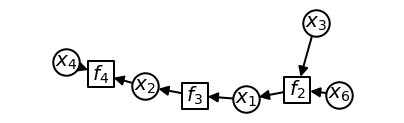

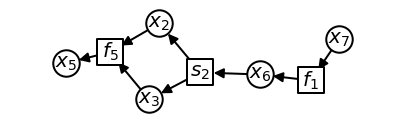

In [13]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(7,2))

In [ ]:
# Find sources of a nested tree
from collections import defaultdict
def dfs_tree(tree, branch):
    childrenmap = defaultdict(list)
    for key,val in tree.items():
        childrenmap[val].append(key)
    visited = set()
    q = [branch]
    while q:
        elt = q.pop()
        visited.add(elt)
        q.extend(childrenmap.get(elt, []))
    return visited

def nested_sources(edges, trees, branch):
    Ein,Eout = edges_to_Ein_Eout(edges)
    Ftree,_,Vtree=trees
    descendants = dfs_tree(Vtree, branch)
    inputs_strictly_below = solver_children(Vtree, descendants-{branch}, solverlist=True)
    comps_below = solver_children(Ftree, descendants-{branch}, solverlist=True)
    srcs = sources(Ein, Eout, filterto=comps_below)
    return srcs - set(inputs_strictly_below)
Stree = {
    5: 3,
    2: 1,
    3: 2,
    4: 2,
    6: 1
}
dfs_tree(Stree, 1)